In [1]:
import os
import math
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
pd.options.display.float_format = '{:.3f}'.format


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
url = "https://raw.githubusercontent.com/allisonchenzhujun/DS-SF-25/master/classes/03/datasets/zillow-03-starter.csv"
df = pd.read_csv(url,index_col= 'ID')


In [10]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.000,0.000,1.000,nan,550.000,nan,1980.000
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.000,0.000,nan,2.000,1430.000,2435.000,1948.000
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.000,0.000,2.000,3.500,2040.000,3920.000,1976.000
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.000,0.000,1.000,1.000,1060.000,nan,1930.000
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.000,0.000,2.000,2.000,1299.000,nan,1993.000
15064295,"111 Chestnut St APT 702, San Francisco, CA",12/17/15,940000.000,0.000,2.000,2.000,1033.000,nan,1993.000
15064391,"1821 Grant Ave APT 101, San Francisco, CA",12/15/15,835000.000,0.000,1.000,1.000,1048.000,nan,1975.000
15064536,"2300 Leavenworth St, San Francisco, CA",12/4/15,2830000.000,0.000,3.000,2.000,2115.000,1271.000,1913.000
15064640,"1047-1049 Lombard St, San Francisco, CA",1/14/16,4050000.000,1.000,nan,nan,4102.000,3049.000,1948.000


In [4]:
# mean, var and std. 
# getting column names: 
df.columns

Index(['Address', 'DateOfSale', 'SalePrice', 'IsAStudio', 'BedCount',
       'BathCount', 'Size', 'LotSize', 'BuiltInYear'],
      dtype='object')

In [15]:
df.mean()

SalePrice     1397422.943
IsAStudio           0.029
BedCount            2.573
BathCount           1.978
Size             1641.301
LotSize          3020.640
BuiltInYear      1947.533
dtype: float64

In [16]:
# pd.options.display.float_format = '{:.2f}'.format
print(df.SalePrice.mean())
print(df.Size.mean())

1397422.943
1641.3009307135471


In [18]:
# print the line where it has the min salesprice. 
df[df.SalePrice == df.SalePrice.min()]

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15149005,"251-253 Missouri St, San Francisco, CA",12/23/15,1.000,0.000,7.000,6.000,2904.000,2482.000,1900.000


In [25]:
# quantile and median
print(df.Size.quantile(.5))
print(df.Size.median())
print(df.Size.quantile(.25))
print(df.Size.quantile(.75))


1350.0
1350.0
1027.5
1947.5


In [26]:
# Final summary of the dataset: describe. 
df.describe()

,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
count,1000.000,986.000,836.000,942.000,967.000,556.000,975.000
mean,1397422.943,0.029,2.573,1.978,1641.301,3020.640,1947.533
std,1736413.342,0.169,1.251,1.130,1027.016,2853.430,38.022
min,1.000,0.000,1.000,1.000,264.000,44.000,1870.000
25%,800000.000,0.000,2.000,1.000,1027.500,2375.000,1912.000
50%,1100000.000,0.000,2.000,2.000,1350.000,2622.000,1939.000
75%,1532500.000,0.000,3.000,2.000,1947.500,3049.000,1986.000
max,32700000.000,1.000,9.000,14.000,11500.000,47916.000,2015.000


 Size has NaN values that .mean() skips.
 
 ### Deeper explanation at the below

> ### What's fraction of the properties sold in the dataset are studios?

In [30]:
print(df.IsAStudio.mean())
print(df.IsAStudio.sum() / df.shape[0])

0.029411764705882353
0.029


About 3 % properties sold in the dataset are studios 

In [27]:
print(df.shape[0])
print(df.shape)

1000
(1000, 9)


In [32]:
df.mean()

SalePrice     1397422.94
IsAStudio           0.03
BedCount            2.57
BathCount           1.98
Size             1641.30
LotSize          3020.64
BuiltInYear      1947.53
dtype: float64

DataFrame.mean() only applies to numerical columns. Address and date of sales aren't included.

### .var() - Compute the unbiased variance (normalized by N-1 by default)

In [33]:
df.var()

SalePrice     3015131295236.64
IsAStudio                 0.03
BedCount                  1.56
BathCount                 1.28
Size                1054762.22
LotSize             8142063.56
BuiltInYear            1445.64
dtype: float64

In [34]:
df.BedCount.std() **2 

1.564729392888862

### Compute the median value 

In [35]:
df.median()

SalePrice     1100000.00
IsAStudio           0.00
BedCount            2.00
BathCount           2.00
Size             1350.00
LotSize          2622.00
BuiltInYear      1939.00
dtype: float64

### .count() - Compute the number of rows/observations without NaN and .sum() - Compute the sum of the values

In [28]:
df.count()
## count() counts the all non nan values

Address        1000
DateOfSale     1000
SalePrice      1000
IsAStudio       986
BedCount        836
BathCount       942
Size            967
LotSize         556
BuiltInYear     975
dtype: int64

In [29]:
df.IsAStudio.dropna().count()

986

In [30]:
df.IsAStudio.isnull().sum()

14

Which leaves 14 houses for which we don't know if they are studios or not.

In [31]:
df.IsAStudio.sum()

29.0

29 propreties are studio. 

### .min() and .max() - Compute the minimum and maximum values

In [45]:
df.min()

Address        1 Crescent Way APT 1402, San Francisco, CA
DateOfSale                                        1/10/16
SalePrice                                            1.00
IsAStudio                                            0.00
BedCount                                             1.00
BathCount                                            1.00
Size                                               264.00
LotSize                                             44.00
BuiltInYear                                       1870.00
dtype: object

In [46]:
df[df.SalePrice == df.SalePrice.min()]

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15149005,"251-253 Missouri St, San Francisco, CA",12/23/15,1.00,0.00,7.00,6.00,2904.00,2482.00,1900.00


In [47]:
df[df.SalePrice == df.SalePrice.max()]

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15083161,"1825 Scott St, San Francisco, CA",11/23/15,32700000.00,0.00,nan,1.00,1100.00,1694.00,1900.00


So much for a deal: a $32M house with a single bathroom and an unknown number of bedrooms!

In [48]:
print(df.SalePrice.quantile(.5))
print(df.SalePrice.median())
print(df.SalePrice.quantile(.25))
print(df.SalePrice.quantile(.75))


1100000.0
1100000.0
800000.0
1532500.0


### .describe() - Generate various summary statistics

In [49]:
df.describe()

,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
count,1000.00,986.00,836.00,942.00,967.00,556.00,975.00
mean,1397422.94,0.03,2.57,1.98,1641.30,3020.64,1947.53
std,1736413.34,0.17,1.25,1.13,1027.02,2853.43,38.02
min,1.00,0.00,1.00,1.00,264.00,44.00,1870.00
25%,800000.00,0.00,2.00,1.00,1027.50,2375.00,1912.00
50%,1100000.00,0.00,2.00,2.00,1350.00,2622.00,1939.00
75%,1532500.00,0.00,3.00,2.00,1947.50,3049.00,1986.00
max,32700000.00,1.00,9.00,14.00,11500.00,47916.00,2015.00


## Plotting

* Boxplots
* Histgrams

* ### Boxplots

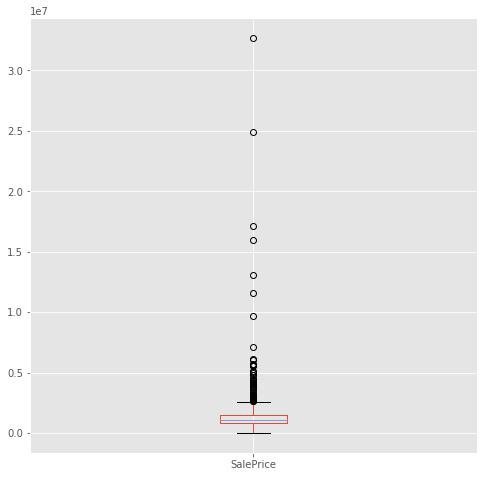

In [34]:
df.SalePrice.plot(kind = 'box', figsize = (8,8))

In [40]:
# first [] refers to the list of names. second [] refers to operation. 
df[['BedCount','BathCount']].mean()

BedCount    2.573
BathCount   1.978
dtype: float64

>####  in the same plot, plot the boxplots for two variable

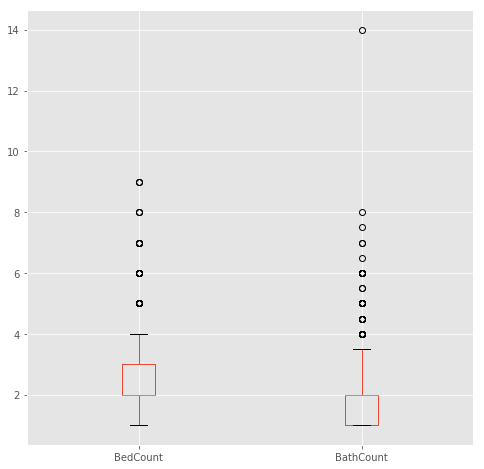

In [41]:
df[['BedCount','BathCount']].plot(kind = 'box', figsize = (8,8))

* ### Histograms

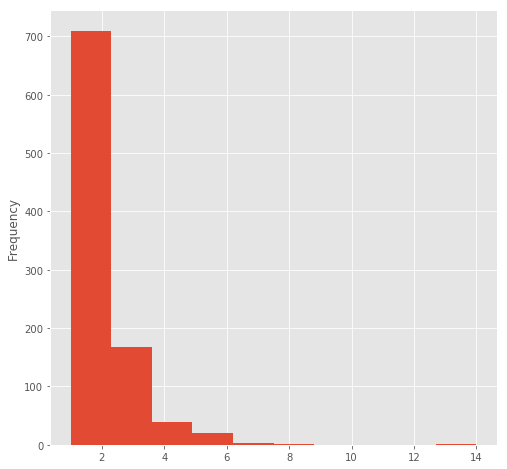

In [45]:
df.BathCount.plot(kind = 'hist', figsize = (8,8))

In [46]:
df.BedCount.dropna().unique()


array([ 1.,  2.,  3.,  5.,  4.,  7.,  6.,  8.,  9.])

In [47]:
int(math.ceil(df.BedCount.max()))

9

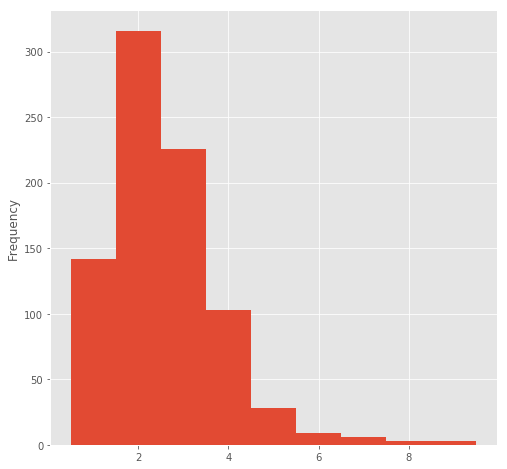

In [48]:
m = int(math.ceil(df.BedCount.max()))
df.BedCount.plot(kind = 'hist', range = (.5, m + .5), bins = m, figsize = (8, 8))
## less right schewed when leave out the NA columns

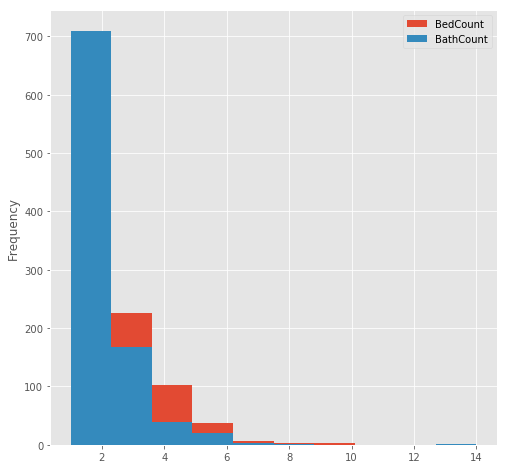

In [61]:
# make two histogram plots in one graph 
df[['BedCount','BathCount']].plot(kind = 'hist', figsize = (8, 8))

### .mode()-- Compute the mode value(s)

In [62]:
df.mode()

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
0,"1 Mono St # B, San Francisco, CA",11/20/15,1100000.00,0.00,2.00,1.00,1000.00,2495.00,1900.00
1,"150 Grand View Ave, San Francisco, CA",NaN,nan,nan,nan,nan,nan,nan,nan
2,"1915 Diamond St, San Francisco, CA",NaN,nan,nan,nan,nan,nan,nan,nan
3,"1954 Golden Gate Ave, San Francisco, CA",NaN,nan,nan,nan,nan,nan,nan,nan
4,"2299 Market St APT 502, San Francisco, CA",NaN,nan,nan,nan,nan,nan,nan,nan
5,"643 Natoma St, San Francisco, CA",NaN,nan,nan,nan,nan,nan,nan,nan
6,"829 Folsom St UNIT 906, San Francisco, CA",NaN,nan,nan,nan,nan,nan,nan,nan


From the documentation: Gets the mode(s) of each element along the columns. Empty if nothing has 2+ occurrences. Adds a row for each mode per label, fills in gaps with NaN. Note that there could be multiple values returned in the columns (when more than one value share the maximum frequency), which is the reason why a dataframe is returned.


In [63]:
df.Address[df.Address == '1 Mono St # B, San Francisco, CA']

ID
59700333    1 Mono St # B, San Francisco, CA
59779608    1 Mono St # B, San Francisco, CA
Name: Address, dtype: object

In [64]:
df.Address[df.Address == '643 Natoma St, San Francisco, CA']

ID
15147343     643 Natoma St, San Francisco, CA
123596761    643 Natoma St, San Francisco, CA
Name: Address, dtype: object

In [65]:
df[df.DateOfSale == '11/20/15'].shape[0]

47

In [66]:
df.DateOfSale == '11/20/15'

ID
15063471      False
15063505      False
15063609      False
15064044      False
15064257      False
15064295      False
15064391      False
15064536      False
15064640      False
15064669      False
              ...  
2108546010    False
2114498518    False
2121221385    False
2121978635    False
2122992200     True
2124214951    False
2126960082     True
2128308939    False
2131957929    False
2136213970    False
Name: DateOfSale, Length: 1000, dtype: bool

In [67]:
(df.DateOfSale == '11/20/15').sum() #  this is good because == is a boolean syntax

47

## Relationships
* .corr()
* Heatmaps
* Scatter Plots
* Scatter matrices

In [49]:
corr  = df.corr()
corr

,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
SalePrice,1.000,0.009,0.379,0.370,0.485,0.392,-0.149
IsAStudio,0.009,1.000,nan,-0.078,0.052,-0.013,-0.050
BedCount,0.379,nan,1.000,0.715,0.723,0.071,-0.345
BathCount,0.370,-0.078,0.715,1.000,0.693,0.109,-0.078
Size,0.485,0.052,0.723,0.693,1.000,0.202,-0.314
LotSize,0.392,-0.013,0.071,0.109,0.202,1.000,0.046
BuiltInYear,-0.149,-0.050,-0.345,-0.078,-0.314,0.046,1.000


* ### Heatmaps

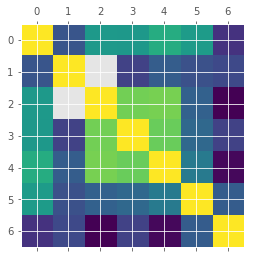

In [50]:
plt.matshow(corr)

In [72]:
list(corr.columns)

['SalePrice',
 'IsAStudio',
 'BedCount',
 'BathCount',
 'Size',
 'LotSize',
 'BuiltInYear']

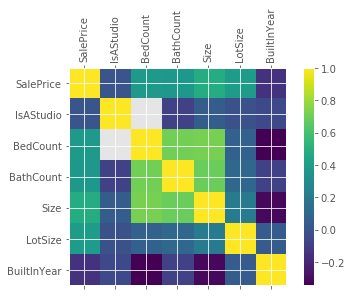

In [51]:
# create correlation matrix
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

* ### Scatter plots

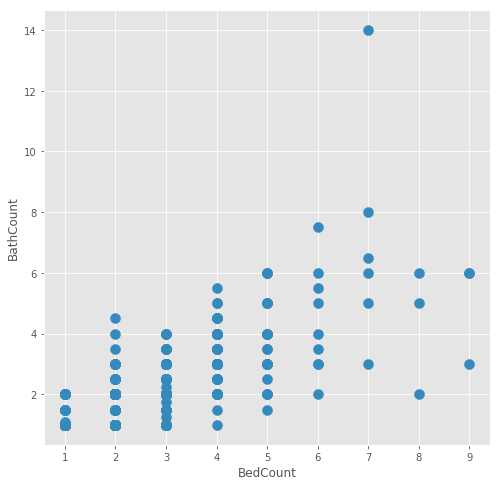

In [52]:
df[ ['BedCount', 'BathCount'] ].plot(kind = 'scatter', x = 'BedCount', y = 'BathCount', s = 100, figsize = (8, 8))

* ### Scatter matrics

/Users/Allison/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf3e080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c0f1a20>]], dtype=object)

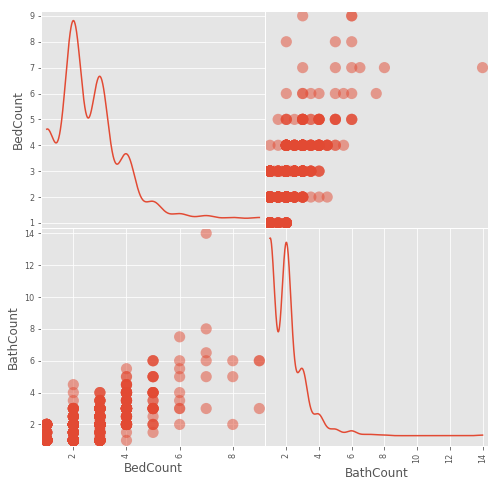

In [53]:
pd.tools.plotting.scatter_matrix(df[ ['BedCount', 'BathCount'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

/Users/Allison/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dc44dd8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11de94eb8>]], dtype=object)

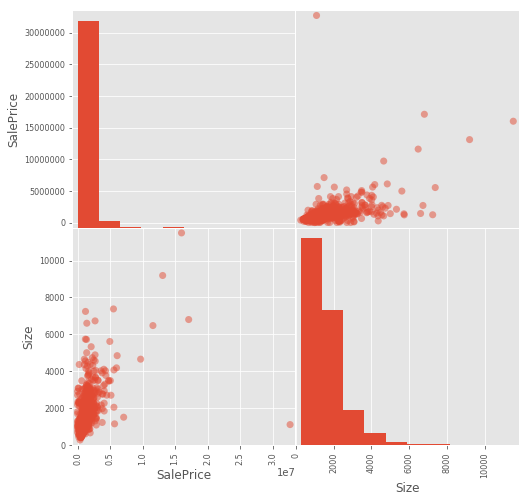

In [54]:
pd.tools.plotting.scatter_matrix(df[ ['SalePrice', 'Size'] ], s = 200, figsize = (8, 8))

## Crosstab
* value_counts()
* crosstab()
> Reproduce the BedCount histogram above. For each possible bed count, how many properties share that bed count?

In [55]:
df.BedCount.value_counts()

2.000    316
3.000    226
1.000    142
4.000    103
5.000     28
6.000      9
7.000      6
9.000      3
8.000      3
Name: BedCount, dtype: int64

Careful to check for Nan values

In [56]:
df.BedCount.isnull().sum()

164

In [58]:
(df.BedCount == np.nan).sum()

0

In [64]:
(df.BedCount == np.nan).sum()

0

> Create a frequency table for BathCount over BedCount

In [57]:
pd.crosstab(df.BathCount,df.BedCount)

BedCount,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
BathCount,,,,,,,,,
1.000,116,133,39,1,0,0,0,0,0
1.100,1,0,0,0,0,0,0,0,0
1.250,0,0,1,0,0,0,0,0,0
1.500,7,19,9,1,1,0,0,0,0
1.750,0,0,1,0,0,0,0,0,0
2.000,17,140,103,21,3,1,0,1,0
2.250,0,0,1,0,0,0,0,0,0
2.500,0,11,22,9,1,0,0,0,0
3.000,0,8,36,38,8,2,1,0,1
